In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from collections import Counter

In [3]:
# Set paths
train_csv_path = 'C:/Users/ashfa/OneDrive/Desktop/Microsopic_Embryo_Classification/dataset/hvwc23/train.csv'
test_csv_path = 'C:/Users/ashfa/OneDrive/Desktop/Microsopic_Embryo_Classification/dataset/hvwc23/test.csv'
train_img_dir = 'C:/Users/ashfa/OneDrive/Desktop/Microsopic_Embryo_Classification/dataset/hvwc23/train'
test_img_dir = 'dataset/hvwc23/test'

In [4]:
# Load CSVs
train_df = pd.read_csv(train_csv_path)
test_df = pd.read_csv(test_csv_path)
sample_sub_df = pd.read_csv('C:/Users/ashfa/OneDrive/Desktop/Microsopic_Embryo_Classification/dataset/hvwc23/sample_submission.csv')

In [5]:
# 1. Basic Info

print("Train CSV:")
print(train_df.info())
print("\nTest CSV:")
print(test_df.info())

print("\nTrain Head:")
print(train_df.head())

print("\nLabel Distribution:")
print(train_df['Class'].value_counts())
print(train_df['Class'].value_counts(normalize=True) * 100)

Train CSV:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Image   840 non-null    object
 1   Class   840 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 13.3+ KB
None

Test CSV:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      180 non-null    int64 
 1   Image   180 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.9+ KB
None

Train Head:
        Image  Class
0  D3_405.jpg      0
1  D3_523.jpg      0
2  D3_750.jpg      0
3  D3_427.jpg      0
4  D3_042.jpg      0

Label Distribution:
Class
0    716
1    124
Name: count, dtype: int64
Class
0    85.238095
1    14.761905
Name: proportion, dtype: float64


In [ ]:
#2. Check for duplicates

# Duplicate rows
duplicate_rows = train_df.duplicated().sum()
print(f"\n🔁 Duplicate rows in train.csv: {duplicate_rows}")

# Duplicate image filenames
duplicate_images = train_df['Image'].duplicated().sum()
print(f"🔁 Duplicate image names in train.csv: {duplicate_images}")



🔁 Duplicate rows in train.csv: 0
🔁 Duplicate image names in train.csv: 0


C:\Users\ashfa\AppData\Local\Temp\ipykernel_23008\3814238913.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df, x='Class', palette='Set2')


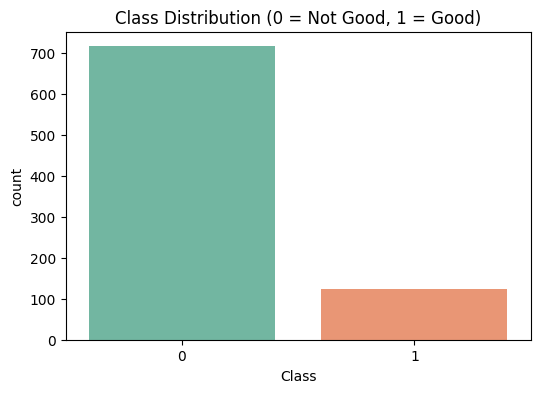

In [ ]:
# 3. Plot Label Distribution

plt.figure(figsize=(6, 4))
sns.countplot(data=train_df, x='Class', palette='Set2')
plt.title("Class Distribution (0 = Not Good, 1 = Good)")
plt.show()

In [ ]:
# 4. Image Dimension Analysis

image_shapes = []
missing = []

for img_name in train_df['Image'].sample(100):
    img_path = os.path.join(train_img_dir, img_name)
    if not os.path.exists(img_path):
        missing.append(img_name)
        continue
    try:
        img = Image.open(img_path)
        image_shapes.append(img.size)
    except Exception as e:
        print(f"Unreadable image {img_name}: {e}")

from collections import Counter
shape_counts = Counter(image_shapes)
print("\nImage Dimension Counts (width x height):")
for shape, count in shape_counts.items():
    print(f"{shape}: {count} images")

print(f"\n🧨 Missing files: {len(missing)} out of 100 sampled")
print(missing[:10])  # show first 10 missing



Image Dimension Counts (width x height):
(276, 260): 1 images
(256, 256): 84 images
(419, 407): 1 images
(296, 288): 1 images
(287, 281): 1 images
(248, 234): 1 images
(357, 367): 1 images
(282, 268): 1 images
(437, 466): 1 images
(256, 237): 1 images
(246, 245): 1 images
(276, 284): 1 images
(436, 446): 1 images
(242, 240): 1 images
(382, 397): 1 images
(258, 256): 1 images
(247, 240): 1 images

🧨 Missing files: 0 out of 100 sampled
[]


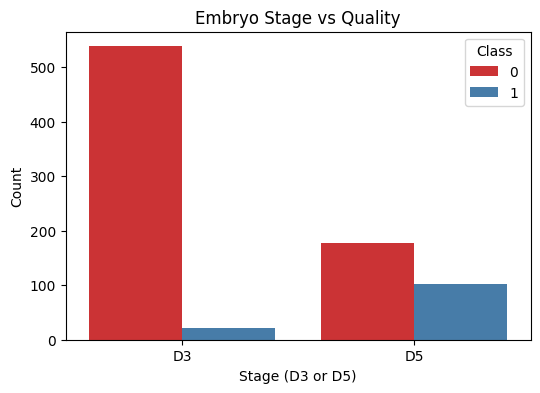


Stage-Class Crosstab:
Class    0    1
Stage          
D3     538   22
D5     178  102


In [ ]:
#5. How many Day-3 vs Day-5 embryos are in each class (0 or 1).

# Add a new column for embryo stage: D3 or D5
train_df['Stage'] = train_df['Image'].str.extract(r'(D\d)_')

# Countplot: Stage vs Class
plt.figure(figsize=(6, 4))
sns.countplot(data=train_df, x='Stage', hue='Class', palette='Set1')
plt.title("Embryo Stage vs Quality")
plt.xlabel("Stage (D3 or D5)")
plt.ylabel("Count")
plt.show()

# Crosstab
print("\nStage-Class Crosstab:")
print(pd.crosstab(train_df['Stage'], train_df['Class']))



🔍 D3 - Good Quality (Class=1)


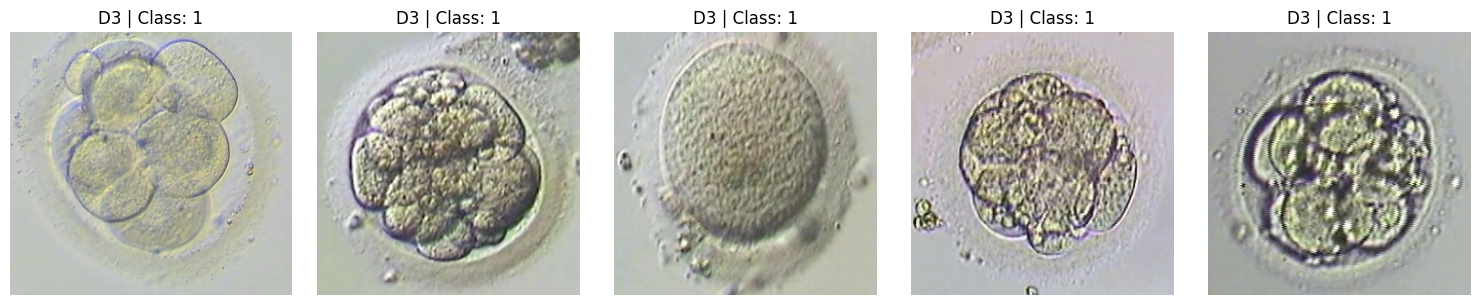


🔍 D3 - Not Good Quality (Class=0)


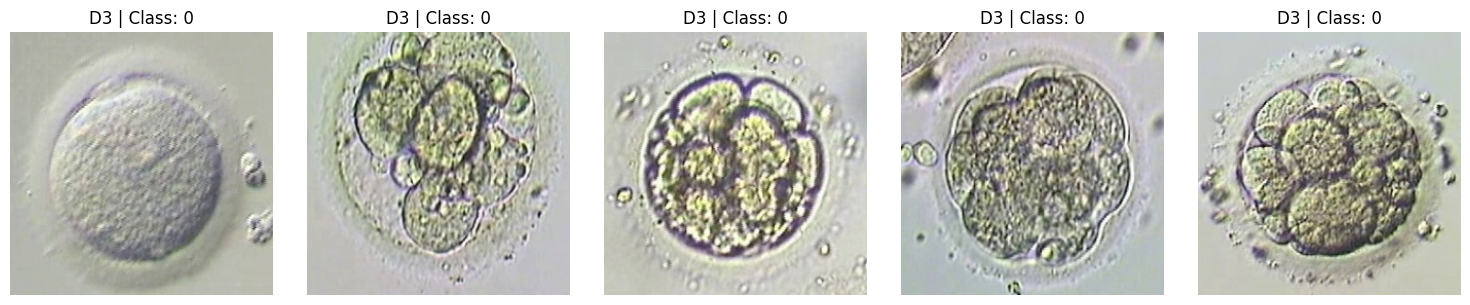


🔍 D5 - Good Quality (Class=1)


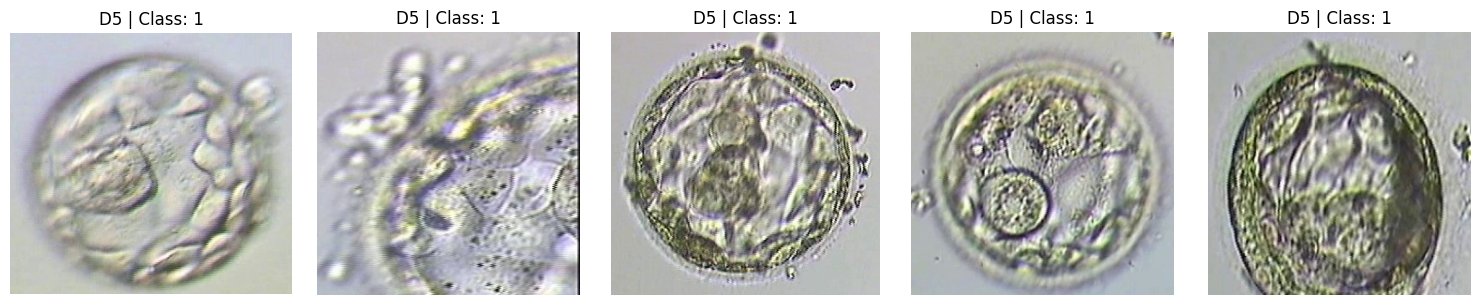


🔍 D5 - Not Good Quality (Class=0)


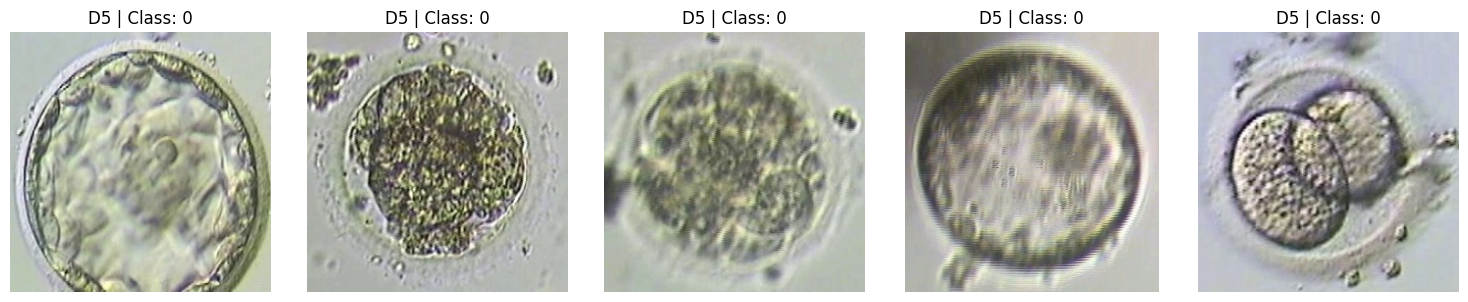

In [12]:
def show_stage_samples(df, stage='D3', label=1, n=5):
    # Filter based on stage and class
    subset = df[df['Image'].str.startswith(stage) & (df['Class'] == label)]
    imgs = subset['Image'].sample(min(n, len(subset)))  # sample up to n
    plt.figure(figsize=(15, 3))
    for i, img_name in enumerate(imgs):
        img_path = os.path.join(train_img_dir, img_name)
        if os.path.exists(img_path):
            img = Image.open(img_path)
            plt.subplot(1, n, i+1)
            plt.imshow(img)
            plt.axis('off')
            plt.title(f"{stage} | Class: {label}")
    plt.tight_layout()
    plt.show()

# Display 5 random samples for each combination
print("\n🔍 D3 - Good Quality (Class=1)")
show_stage_samples(train_df, stage='D3', label=1)

print("\n🔍 D3 - Not Good Quality (Class=0)")
show_stage_samples(train_df, stage='D3', label=0)

print("\n🔍 D5 - Good Quality (Class=1)")
show_stage_samples(train_df, stage='D5', label=1)

print("\n🔍 D5 - Not Good Quality (Class=0)")
show_stage_samples(train_df, stage='D5', label=0)
